In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

def get_score_df(path2target, filename='learning-curve.out'):
    result_start_row_idx = 0
    with open(os.path.join(path2target, filename)) as f:
        l_strip = [s.strip() for s in f.readlines()]

    for i, line in enumerate(l_strip):
        if '#' in line:
            result_start_row_idx = i
            
    scores = []
    for l in l_strip[result_start_row_idx+1:]:
        l = list(map(float, list(filter(None, l.split(' ')))))
        scores.append(l)
        
    scores = np.array(scores)
    columns = list(filter(None, l_strip[result_start_row_idx-1].split(' ')))[1:]
    df = pd.DataFrame(scores, columns=columns)
    
    return df

def plot_learning_curve(df, path2save=None, title=None):
    fig = plt.figure(figsize=(20,10))
    fig.set_facecolor('white')
    axes = fig.subplots(2, 1)
    
    # Force
    axes[0].plot(df['epoch'], df['RMSE_Ftrain_pu'], c='red', label='train')
    axes[0].plot(df['epoch'], df['RMSE_Ftest_pu'], label='test')
    axes[0].set_title(title)
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('RMSE_F')
    # axes[0].set_ylim(-1, 2)
    axes[0].set_yscale('log')
    axes[0].legend()
    
    # Energy
    axes[1].plot(df['epoch'], df['RMSEpa_Etrain_pu'], c='red', label='train')
    axes[1].plot(df['epoch'], df['RMSEpa_Etest_pu'], label='test')
    axes[1].set_title(title)
    axes[1].set_xlabel('epoch')
    axes[1].set_ylabel('RMSE_E')
    axes[1].set_yscale('log')
    # axes[1].set_ylim(-1, 2)
    axes[1].legend()
    
    if path2save is not None:
        fig.savefig(os.path.join(path2save, f'{title}.png'))
    fig.show()

In [12]:
# path2root = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/91'
# # path2save = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/16/learning-curve/fig'

# df = get_score_df(path2target=path2root)
# plot_learning_curve(
#     df=df,
#     title=''
# )

/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_86113/2372550174.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_86113/2372550174.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_86113/2372550174.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipykernel_86113/2372550174.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/var/folders/hl/8xx4rtm50t7czkr79gggbqqr0000gr/T/ipy

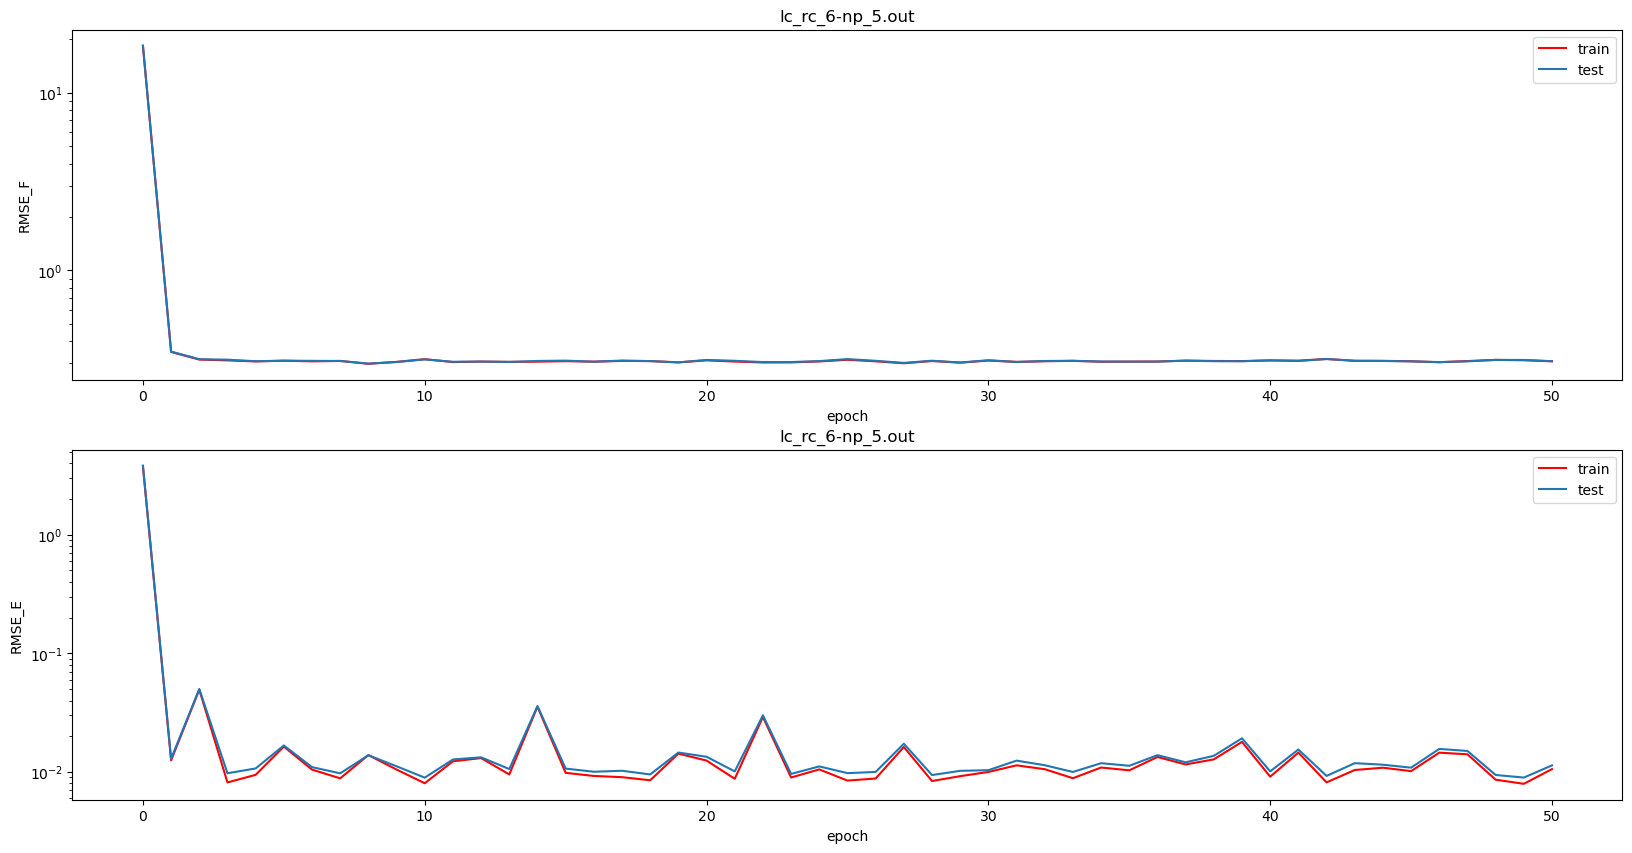

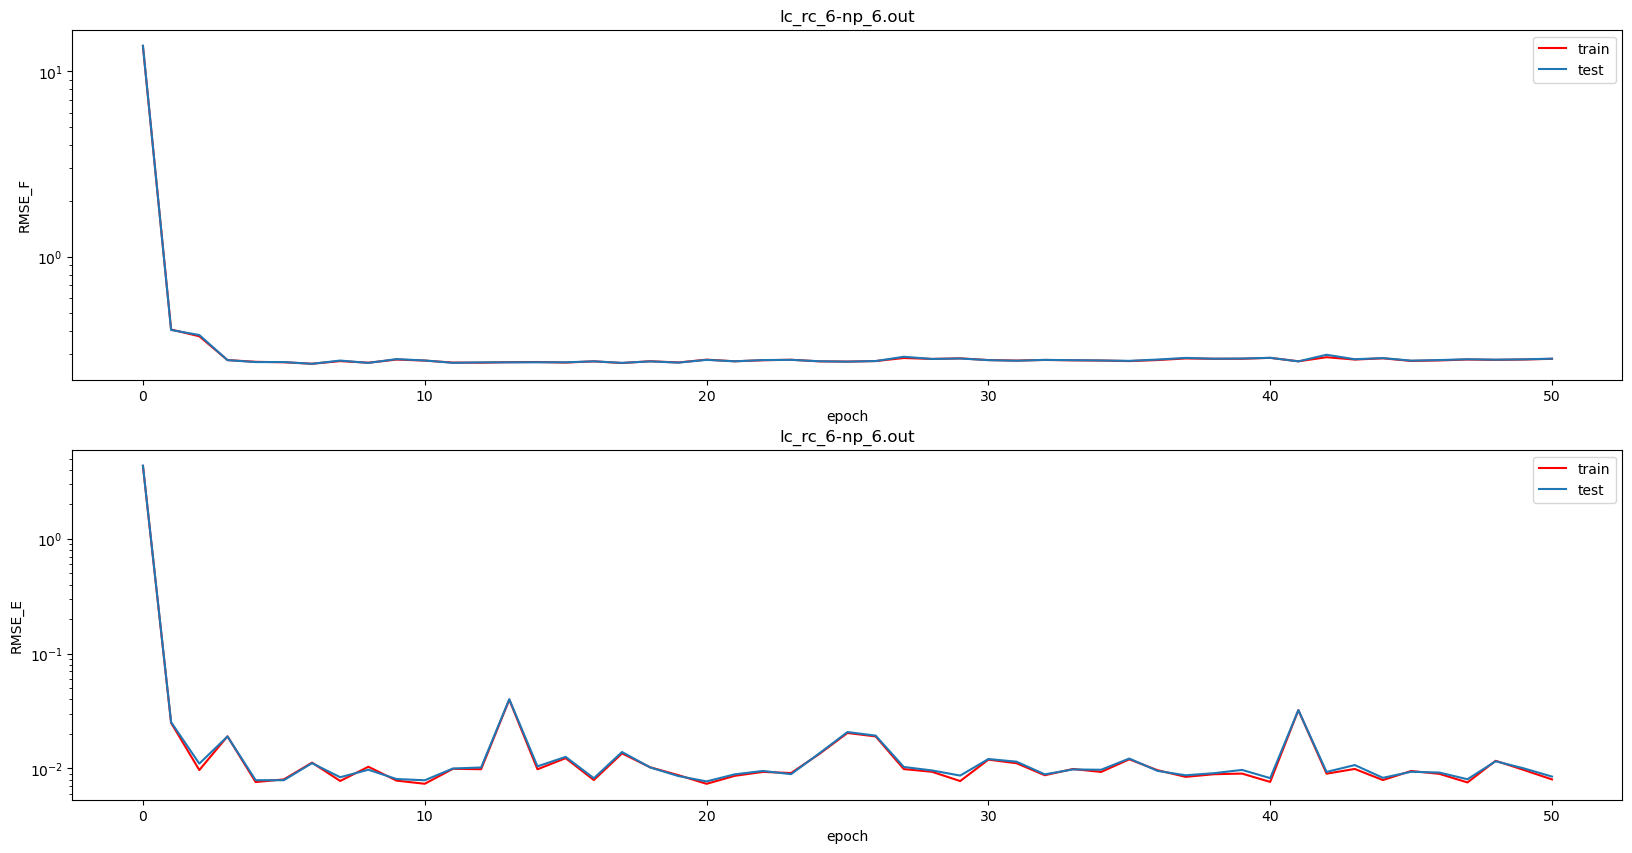

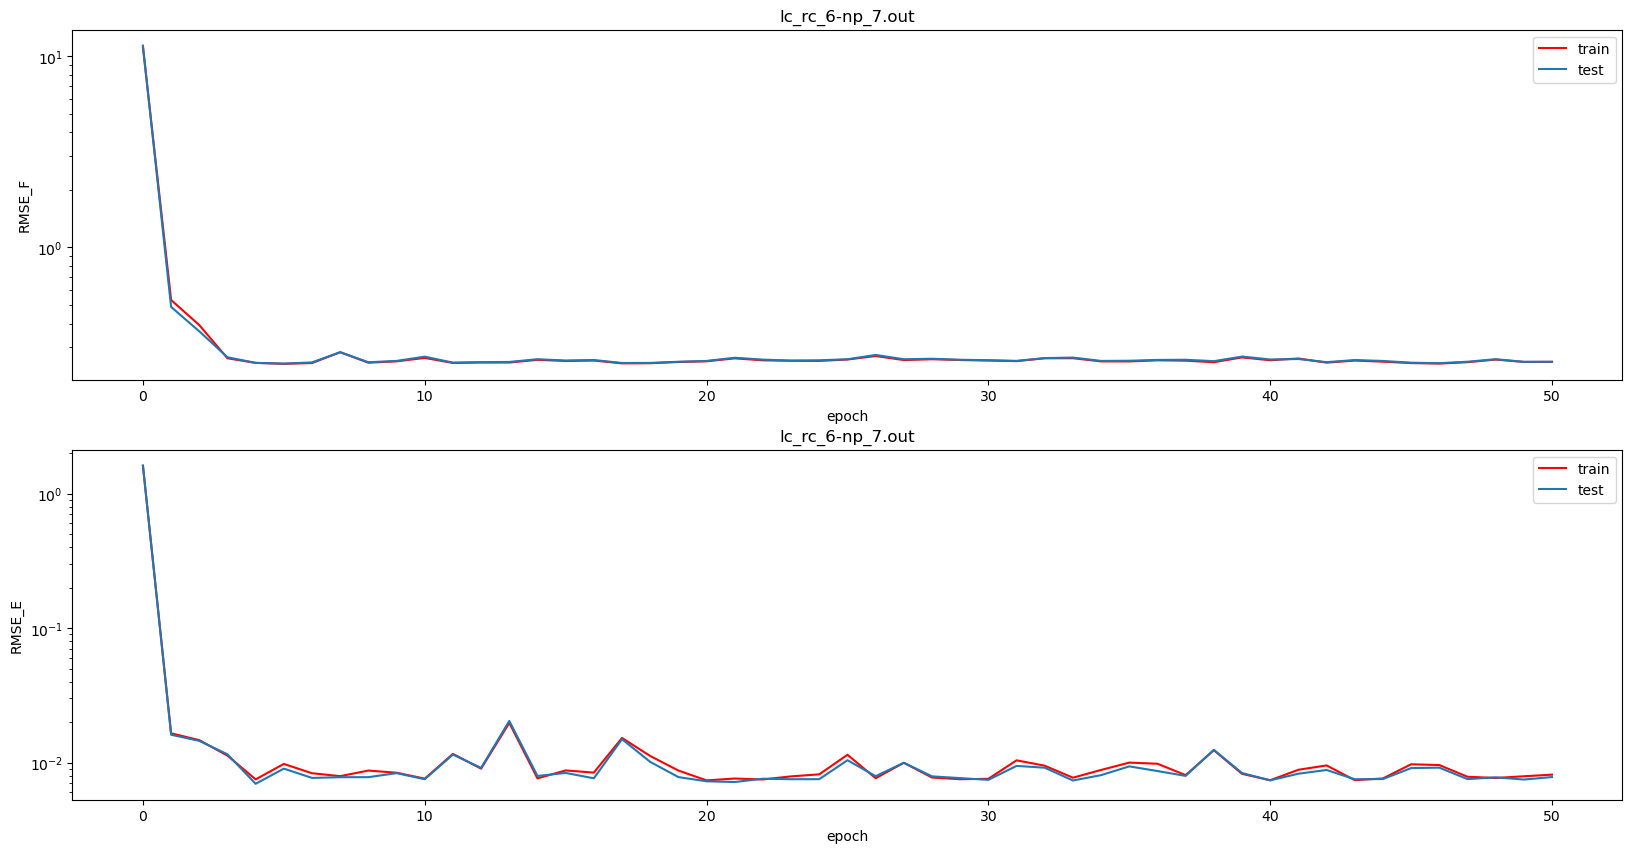

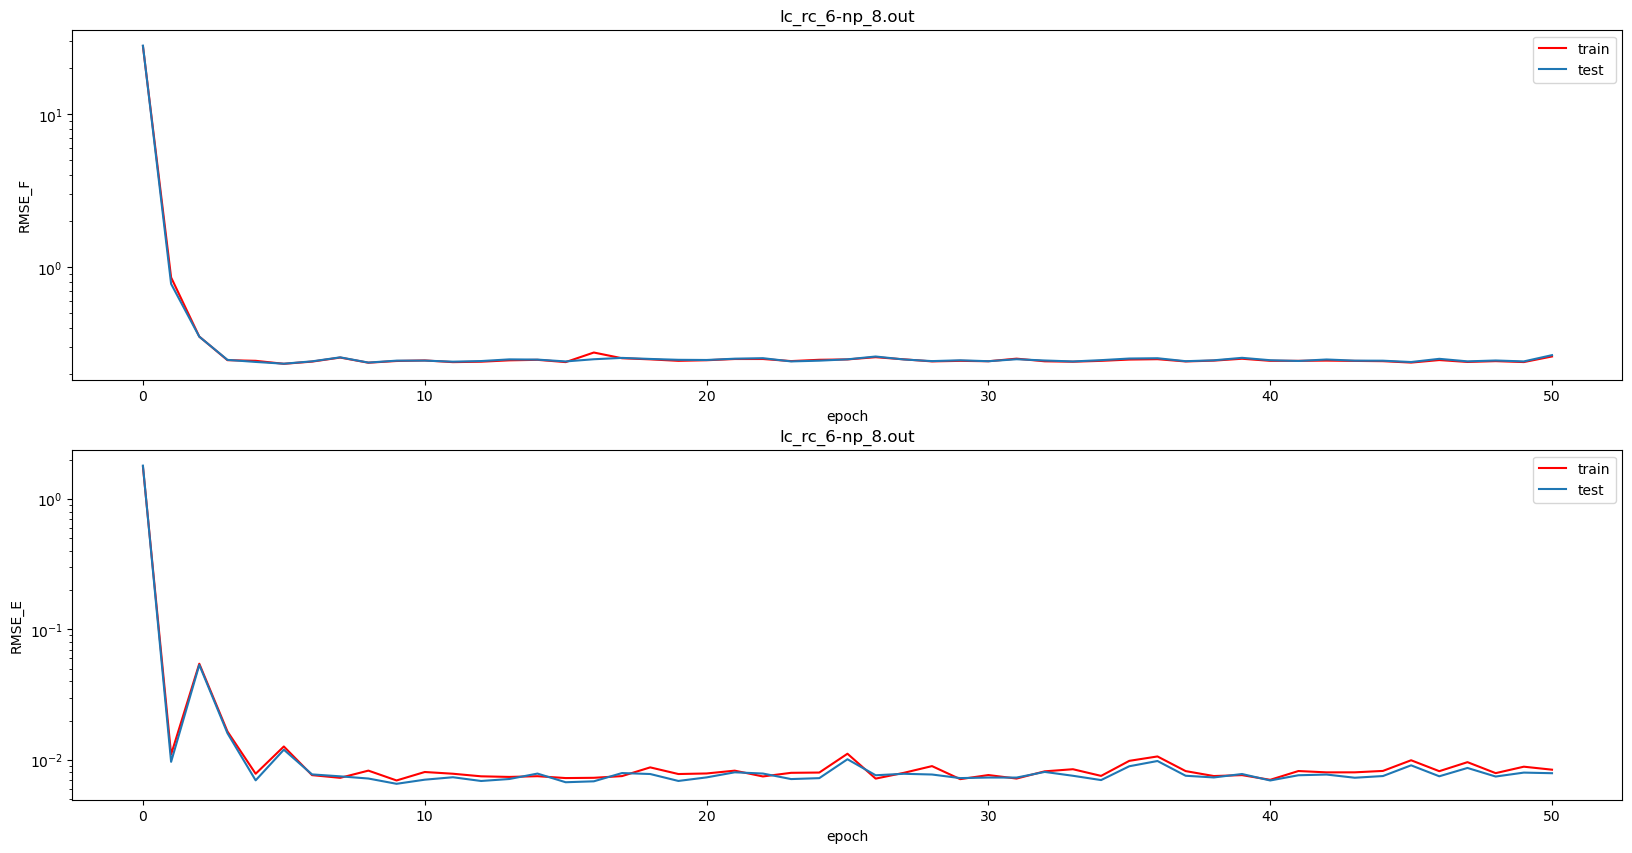

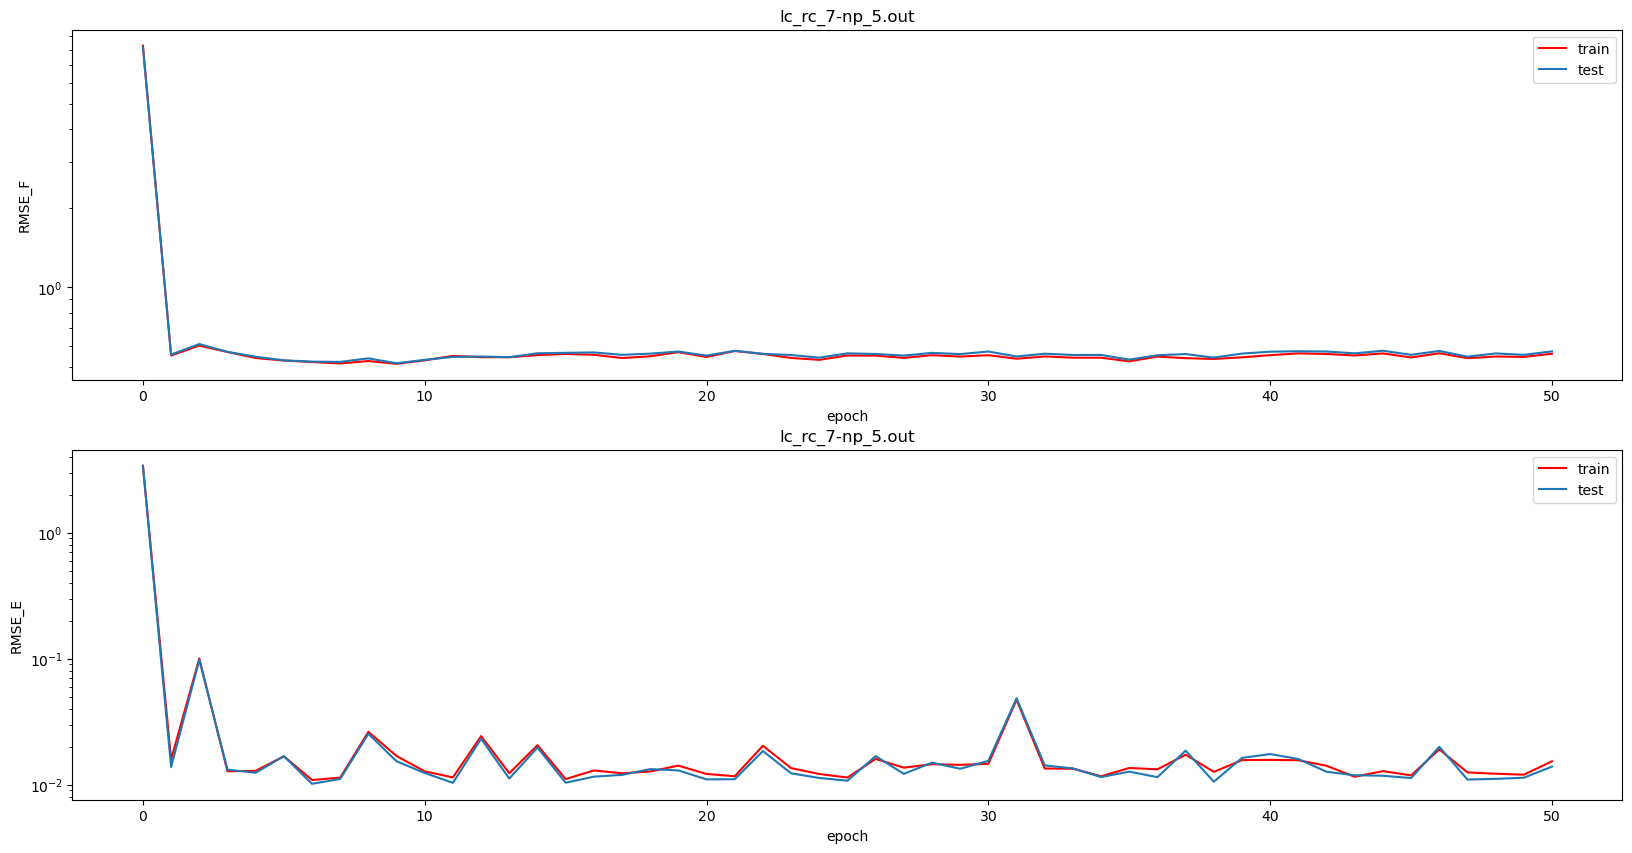

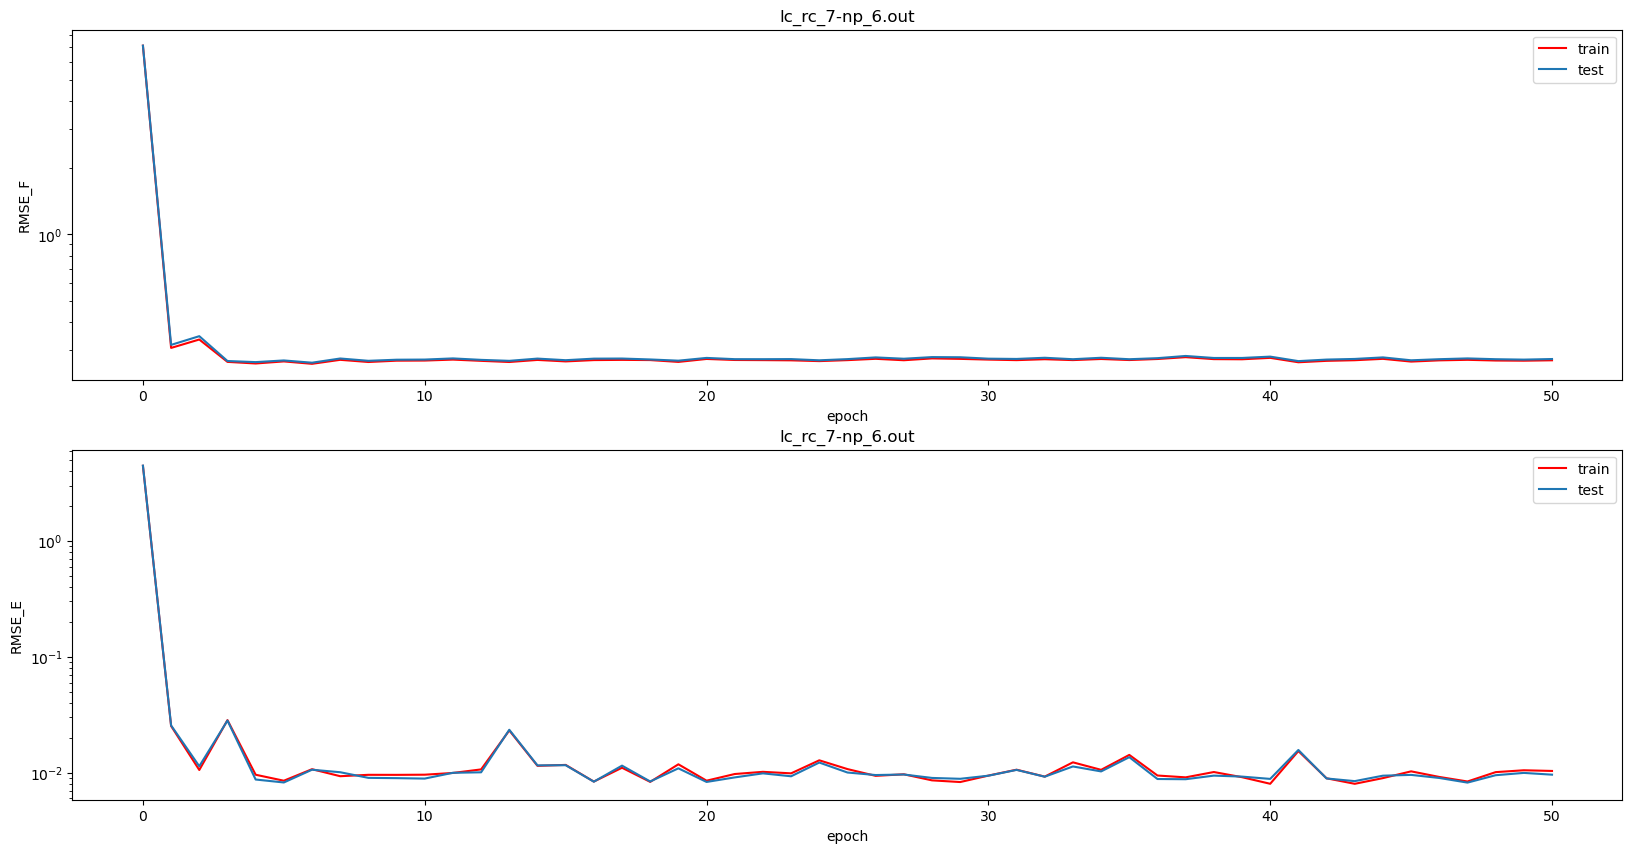

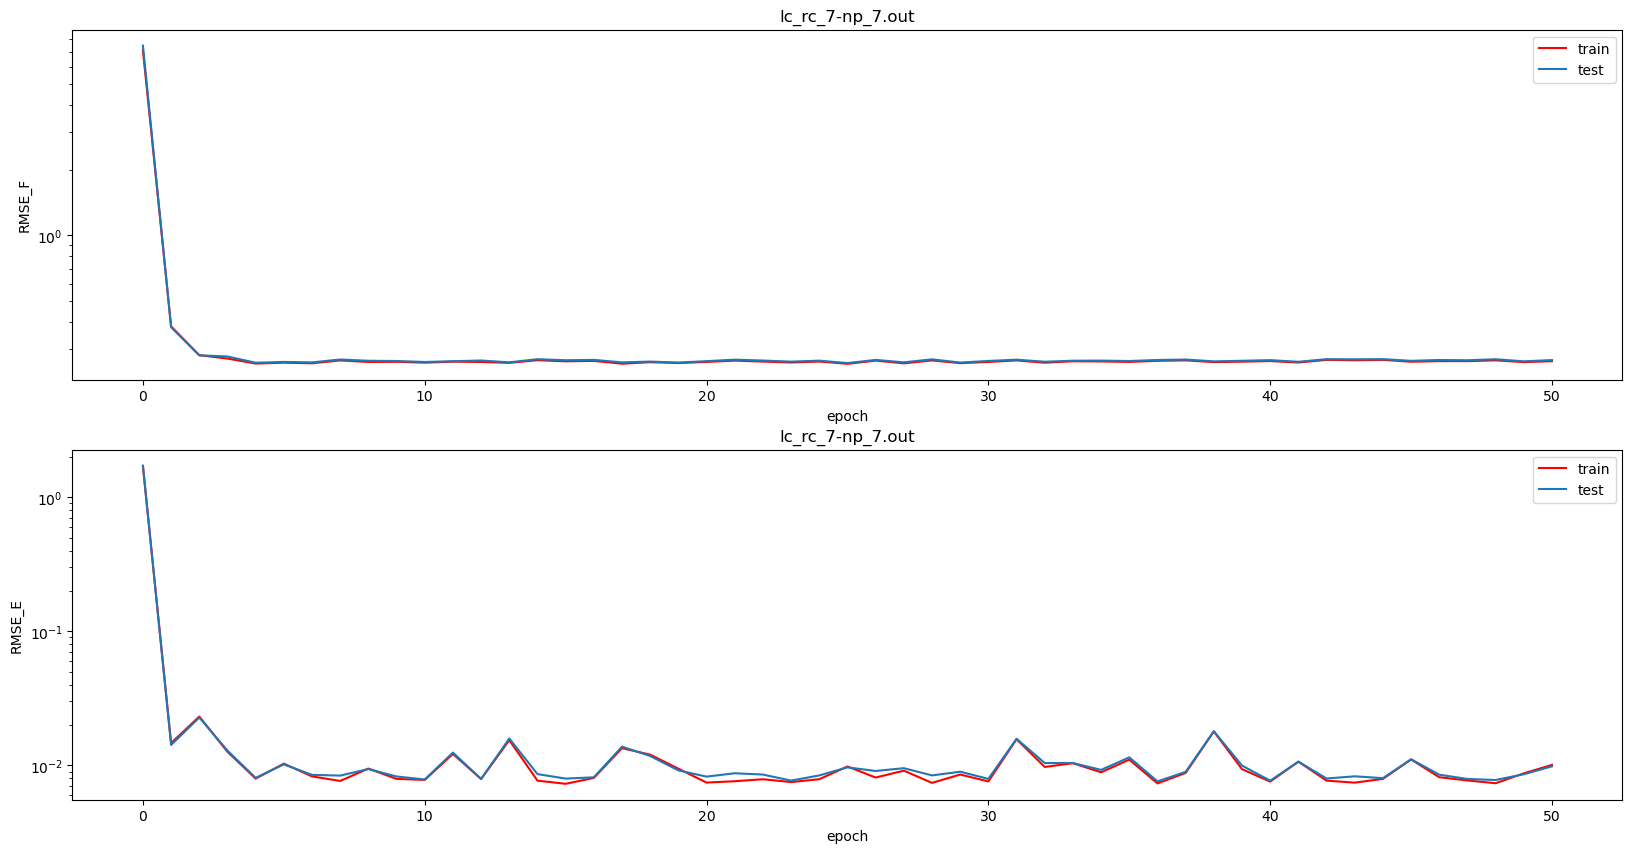

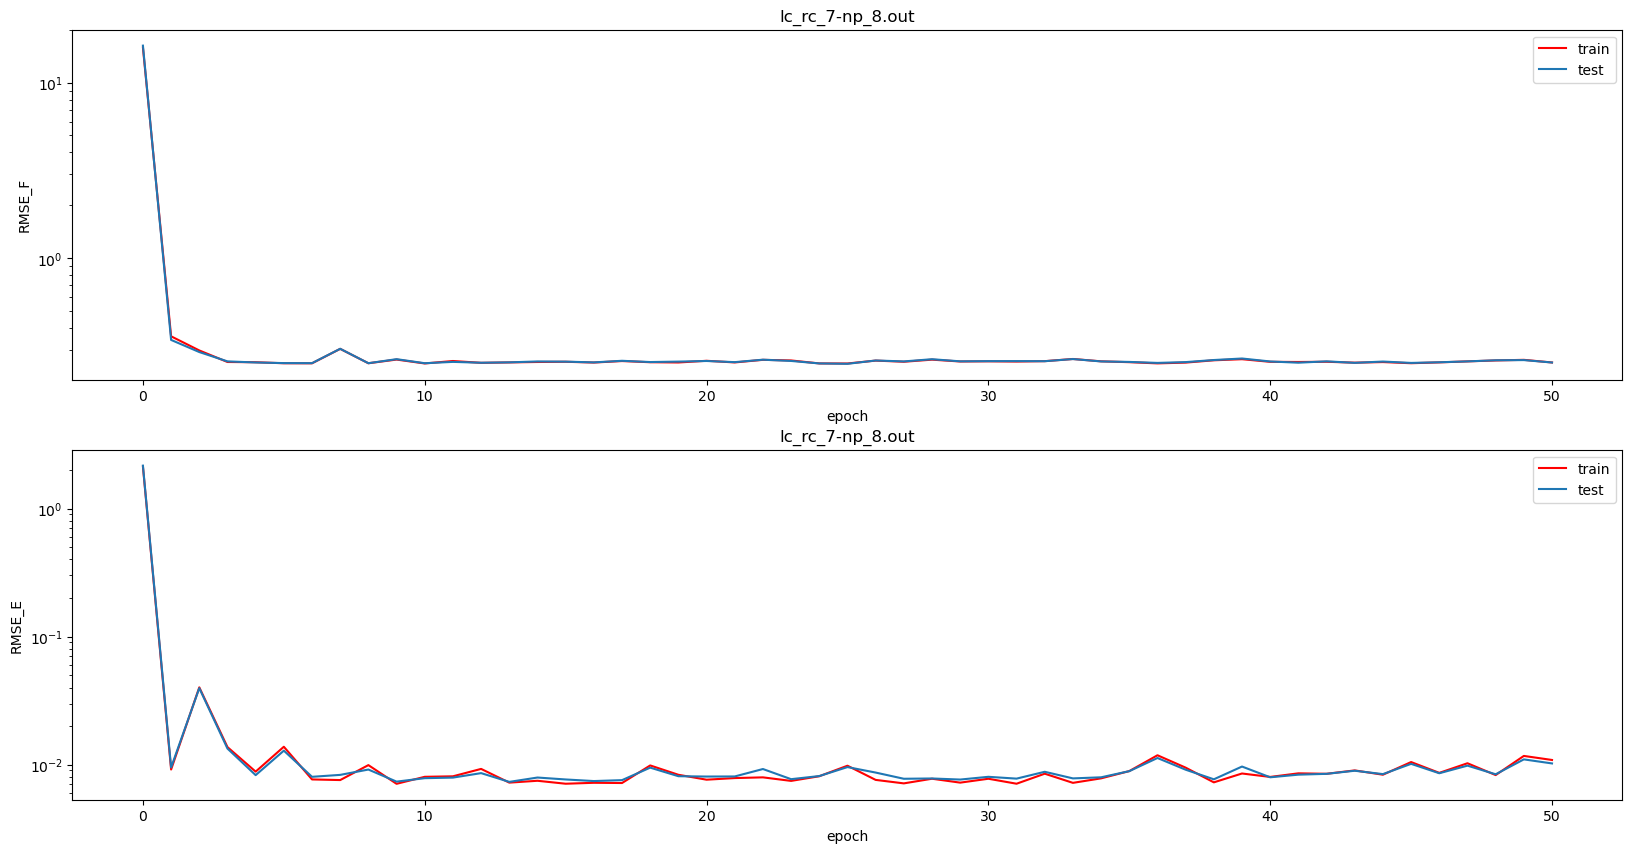

In [13]:
path2root = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/93/learning-curve/'
# path2save = '/Users/y1u0d2/desktop/Lab/result/n2p2/Si/16/learning-curve/fig'

files = glob.glob(f'{path2root}/lc*.out')
files.sort()
for f in files:
    filename = f.split('/')[-1]
    df = get_score_df(path2target=path2root, filename=filename)
    plot_learning_curve(
        df=df,
        title=filename
    )